<h1><div class="alert alert-block alert-info">
Time Series - Exponential Smoothing
</div></h1>

Exponential Smoothing is a collection of models (constant, linear, seasonal. . . ) in which the importance of the observed data decreases with its age, used to forecast the <font color='blue'> <b>deterministic</b></font> components of a time series (trend and seasonality).

<h2>Simple Exponential Smoothing (SES)</h2>

The result of this forecast is a <font color='orange'><b>constant</b></font> that is applied to all future predictions.

$\hat x_{n,h}= \alpha \sum_{j=0}^{n-1}(1-\alpha)^jx_{n-j}$

In this forecasting method the higher the tuning parameter $\alpha$ the smaller is the importance of the past observations.

In [15]:
library(forecast)

In [24]:
data=read.csv(file="http://eric.univ-lyon2.fr/~jjacques/Download/DataSet/varicelle.csv")
vari_train<-ts(data$x[1:480],start=c(1931,1),end=c(1970,12),freq=12)
vari_test<-ts(data$x[481:498],start=c(1971,1),end=c(1972,6),freq=12)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
"Removed 288 rows containing missing values (geom_path)."


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.6,338.15,251.29,-24.53,61,1.04,0.51


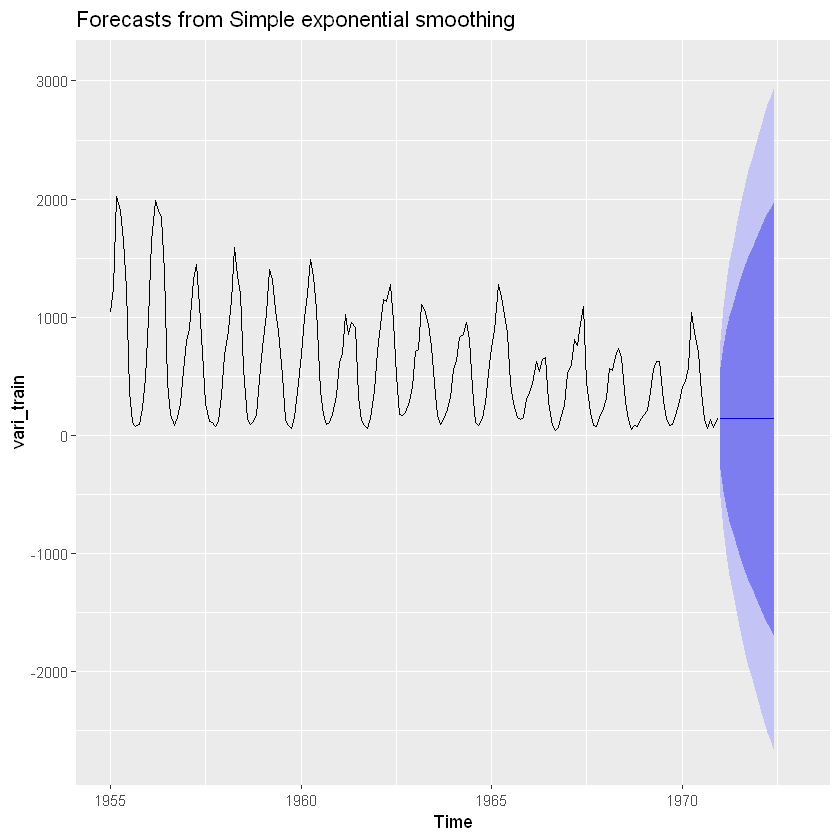

In [25]:
SES=ses(vari_train,h=18)
autoplot(SES, xlim=c(1955,1973))
round(accuracy(SES),2)

<h2>The Holt-Winters seasonal</h2>

The Holt-Winters seasonal methodcomprises the forecast equation and three smoothing equations — one for the level $ℓ_t$, one for the trend $b_t$, and one for the seasonal component $s_t$, with corresponding smoothing parameters α, β and γ.

Source: https://otexts.com/fpp2/holt-winters.html

<h2>Non seasonal Holt-Winters smoothing</h2>

Forecasting using a linear trend: $\hat x_{n,h} = \hat a_1 + \hat a_2h$

This model has two smoothing constants (α, β) acting on a1 and a2.

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.22,330.42,259.65,54.15,89.34,1.08,0.01


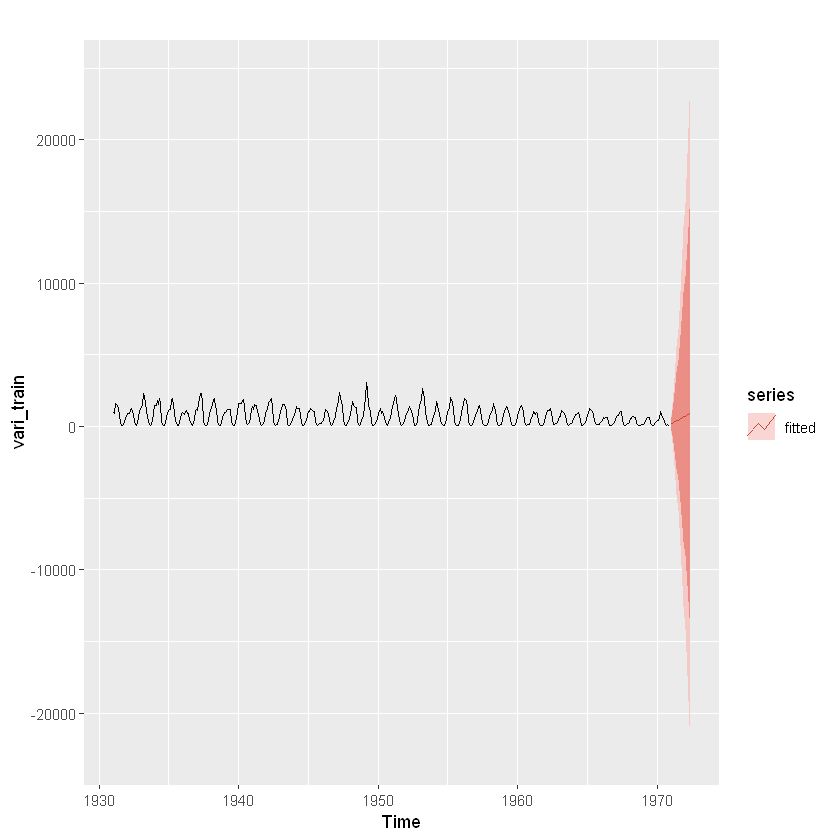

In [43]:
NON_SEASONAL_HOLT=holt(vari_train,h=18)
round(accuracy(NON_SEASONAL_HOLT),2)
autoplot(vari_train) + autolayer(NON_SEASONAL_HOLT,series='fitted')

<h2>Damped non seasonal Holt-Winters smoothing</h2>

$\hat x_{n,h} = \hat a_1 + \hat a_2(\phi + \phi^2 + ...+ \phi^h)$

with $ 0 < \phi < 1 $ dampens the trend so that it approaches a constant
in the future

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.22,330.42,259.65,54.15,89.34,1.08,0.01


Warning message:
"Ignoring unknown parameters: xlim"
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



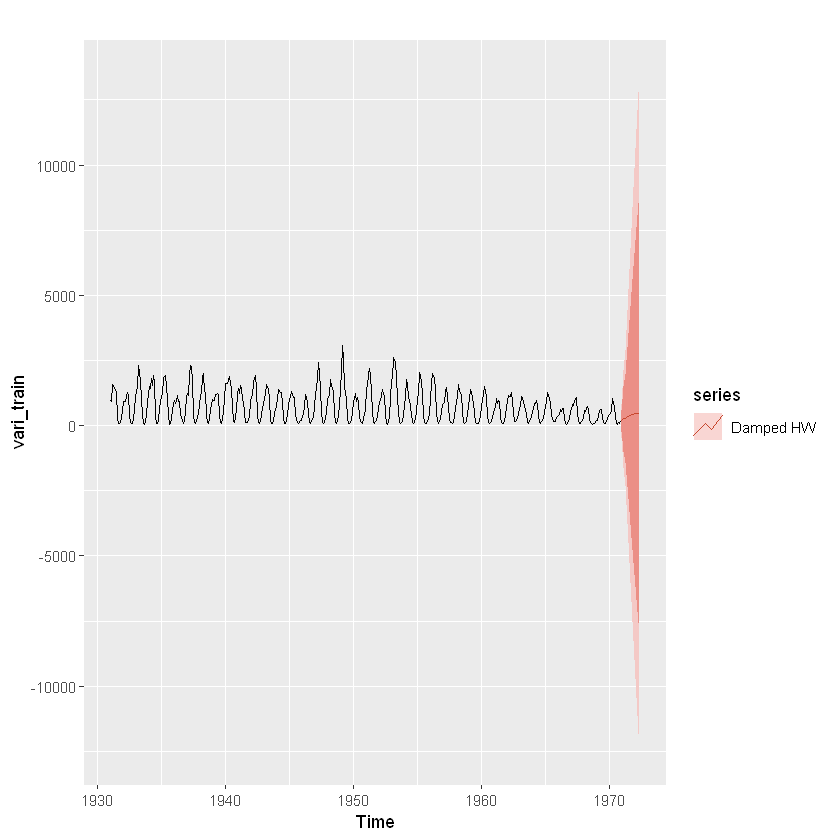

In [44]:
HOLT_DAMPED = holt(vari_train,damped=TRUE,phi=0.9,h=18)
round(accuracy(HOLT),2)
autoplot(vari_train) +
autolayer(HOLT_DAMPED,series='Damped HW')

In [36]:
e1 <- tsCV(data, ses, h=18)
e2 <- tsCV(data, holt, h=18)
e3 <- tsCV(data, holt, damped=TRUE, h=18)
data.frame( model = c('Simple Exponential Smoothing','Non seasonal Holt-Winters','Damped non seasonal Holt-Winters'), 
RSME = c(mean(e1^2, na.rm=TRUE),mean(e2^2, na.rm=TRUE),mean(e3^2, na.rm=TRUE)))

model,RSME
<fct>,<dbl>
Simple Exponential Smoothing,662562
Non seasonal Holt-Winters,11191722
Damped non seasonal Holt-Winters,1877474


<h2>Additive seasonal Holt-Winters</h2>

Forecasting with a linear trend plus an additive seasonal pattern.

$\hat x_{n,h} = \hat a_1 + \hat a_2h + \hat s_{n+h-T}$ for $1 \leq h \leq T$

$\hat x_{n,h} = \hat a_1 + \hat a_2h + \hat s_{n+h-2T}$ for $T+1 \leq h \leq 2T$

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-7.54,209.45,161.3,2.11,43.07,0.67,0.36


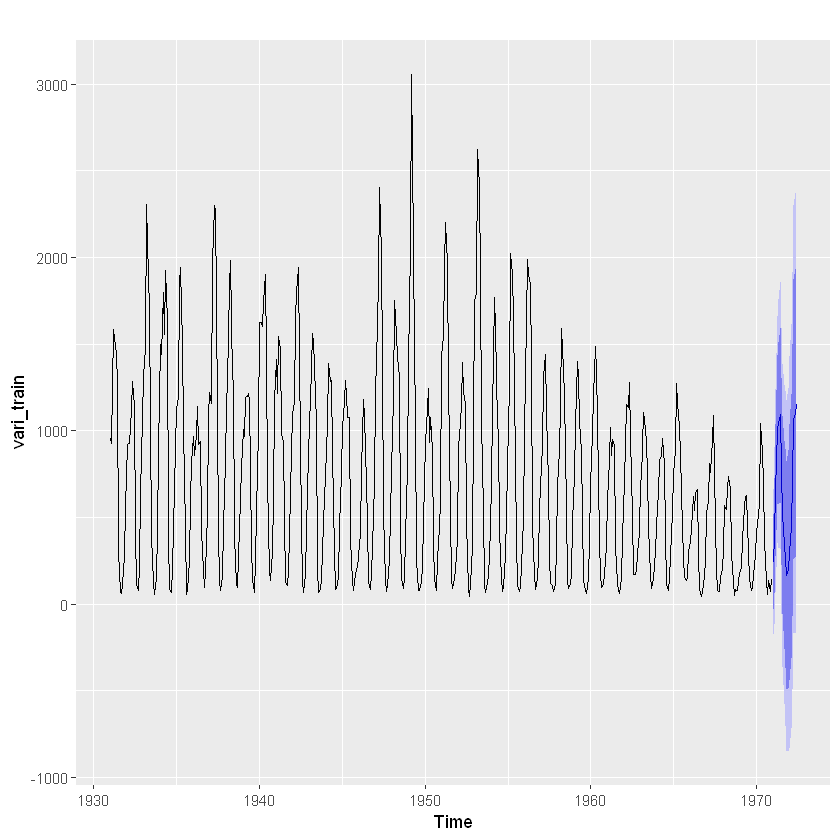

In [51]:
ADDITIVE_HOLT=hw(vari_train,seasonal='additive',h=18)
autoplot(vari_train) + autolayer(ADDITIVE_HOLT,series='HW add.', col =4)
round(accuracy(ADDITIVE_HOLT),2)

<h2>Multiplicative seasonal Holt-Winters</h2>

Forecasting with a linear trend time a multiplicative seasonal pattern.

$\hat x_{n,h} = [\hat a_1 + \hat a_2h]\hat s_{n+h-T}$ for $1 \leq h \leq T$

$\hat x_{n,h} = [\hat a_1 + \hat a_2h]\hat s_{n+h-2T}$ for $T+1 \leq h \leq 2T$

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.9,166.88,116.97,-8.23,23.37,0.49,0.18


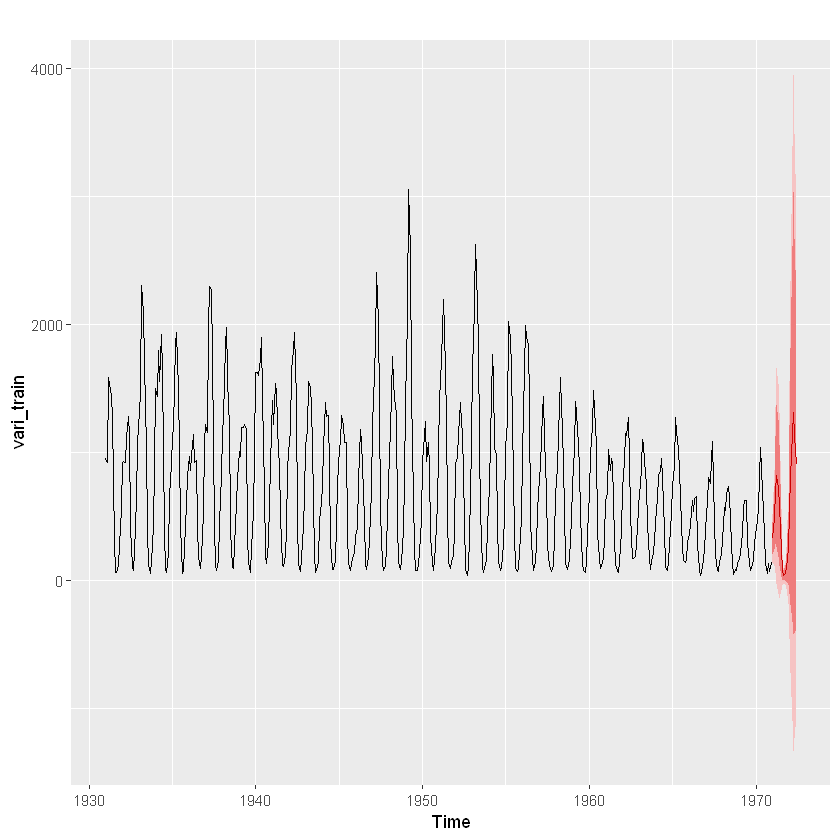

In [59]:
MULT_HOLT=hw(vari_train,seasonal='multiplicative',h=18)
autoplot(vari_train) + autolayer(MULT_HOLT,series='HW add.', col =2) 
round(accuracy(MULT_HOLT),2)

In [60]:
data.frame( model = c('Additive seasonal Holt-Winters','Multiplicative seasonal Holt-Winters'), 
RSME = c(sqrt(mean((ADDITIVE_HOLT$mean-vari_test)^2)),sqrt(mean((MULT_HOLT$mean-vari_test)^2))))

model,RSME
<fct>,<dbl>
Additive seasonal Holt-Winters,238.2674
Multiplicative seasonal Holt-Winters,214.7901


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.51,215.07,166.98,3.17,46,0.69,0.45


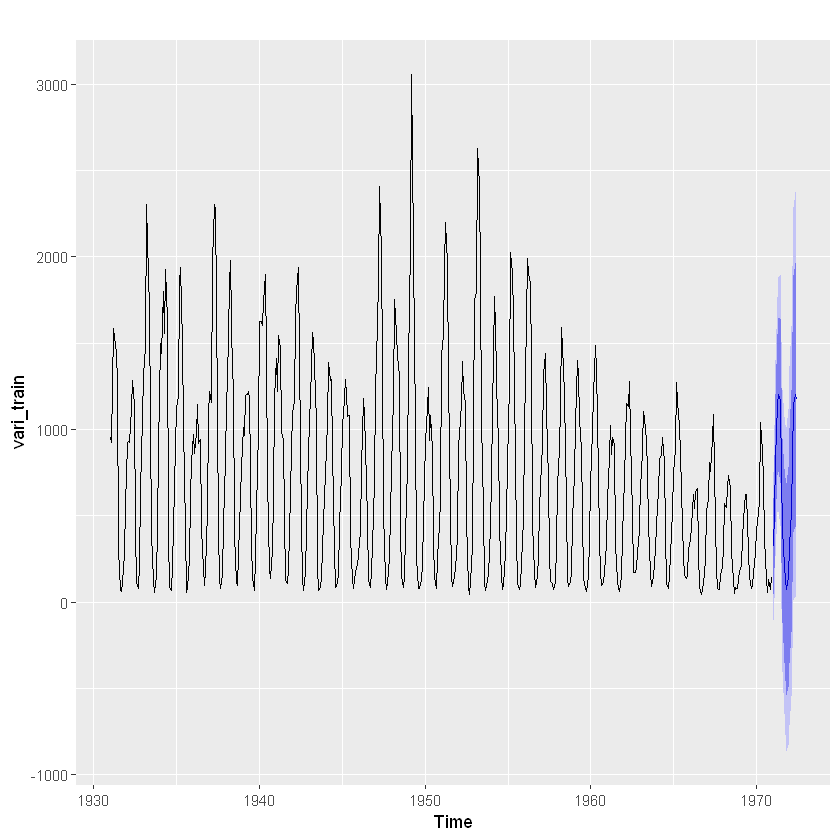

In [64]:
ADDITIVE_HOLT_DAMPED=hw(vari_train,seasonal='additive',h=18, damped = TRUE)
autoplot(vari_train) + autolayer(ADDITIVE_HOLT_DAMPED,series='HW add.', col =4)
round(accuracy(ADDITIVE_HOLT_DAMPED),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,13.19,158.75,112.03,-4.18,21.28,0.47,0.09


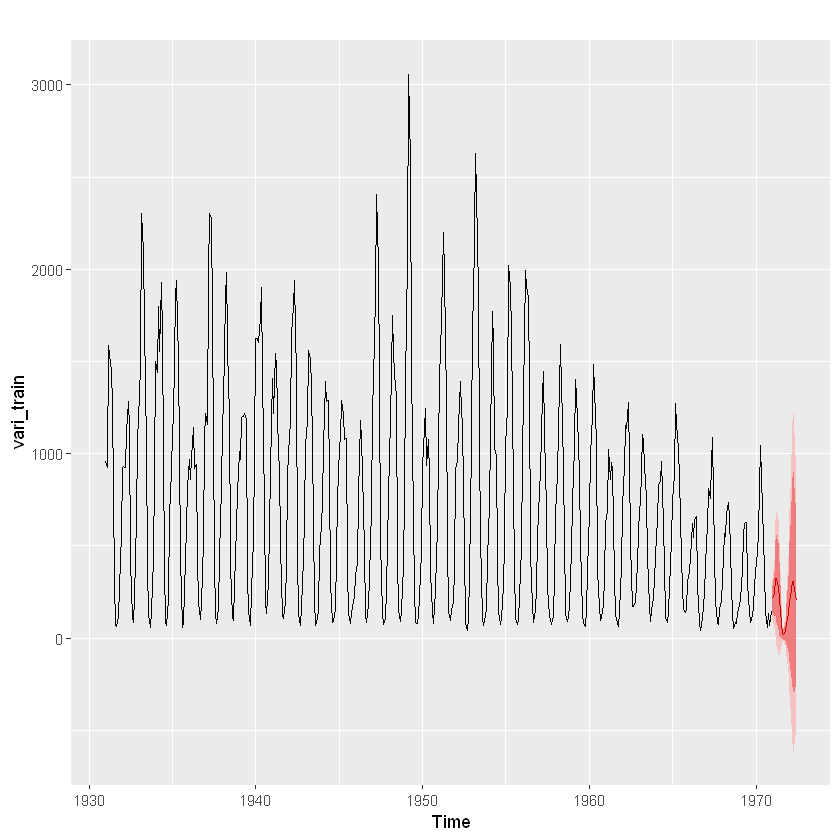

In [65]:
MULT_HOLT_DAMPED=hw(vari_train,seasonal='multiplicative',h=18, damped = TRUE)
autoplot(vari_train) + autolayer(MULT_HOLT_DAMPED,series='HW add.', col =2) 
round(accuracy(MULT_HOLT_DAMPED),2)

In [66]:
data.frame( model = c('Damped additive seasonal Holt-Winters','Damped multiplicative seasonal Holt-Winters'), 
RSME = c(sqrt(mean((ADDITIVE_HOLT_DAMPED$mean-vari_test)^2)),sqrt(mean((MULT_HOLT_DAMPED$mean-vari_test)^2))))

model,RSME
<fct>,<dbl>
Damped additive seasonal Holt-Winters,279.7424
Damped multiplicative seasonal Holt-Winters,375.6358
